In [52]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import scipy.integrate as integrate

import scipy.special as special

In [53]:
data=np.loadtxt("HADES.cumulants.data.dat",skiprows=1)
hades_top=np.loadtxt("HADES-top.csv",delimiter=",")
hades_bottom=np.loadtxt("HADES-bottom.csv",delimiter=",")
df=np.loadtxt("data.dat")

In [54]:
from pylab import *
from scipy.optimize import curve_fit
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)



In [55]:
x_data=data[:,0]
w_data=data[:,1]
skew_data=data[:,3]
kurt_data=data[:,5]

In [56]:
#ACCEPTANCE X FROM Y AND CUMULANTS

def x_from_y(x,width):
    norm = integrate.quad(lambda z: gauss(z,0,width,1), -.5, .5)
    return (integrate.quad(lambda z: gauss(z,0,width,1), -x, x)[0]/norm[0])

def wn(x,wN):
    return 1-x+x*wN
def Sn(x,wN,SN):
    return wN/wn(x,wN)*(x**2*SN+3*x*(1-x))+(1-x)/wn(x,wN)*(1-2*x)
def kn(x,wN,SN,kN):
    return wN/wn(x,wN)*(x**3*kN+6*x**2*(1-x)*SN+x*(1-x)*(7-11*x))+(1-x)/wn(x,wN)*(1-6*x*(1-x))

In [57]:
#FITS THE OMEGA FOR BEST WIDTH OF THE Y SPECTRA
def model(x,sigma):
    y=np.empty(x.size,dtype=np.float32)
    W=np.empty(x.size,dtype=np.float64)
    for i in range(x.size):
        y[i]=x_from_y(x[i],sigma)
        W[i]=wn(y[i],w_data[-1])
    return W
expected=.2
params,cov=curve_fit(model,x_data[:4],w_data[:4],p0=expected,method="dogbox") 
print(params)

[0.31404472]


In [71]:
yt

array([0.        , 0.01405017, 0.02809763, 0.04213966, 0.05617358,
       0.07019667, 0.08420625, 0.09819961, 0.1121741 , 0.12612703,
       0.14005578, 0.15395766, 0.16783008, 0.18167044, 0.19547613,
       0.20924458, 0.22297326, 0.23665962, 0.25030118, 0.26389545,
       0.27743998, 0.2909324 , 0.30437022, 0.31775117, 0.33107287,
       0.34433305, 0.3575294 , 0.37065977, 0.38372192, 0.39671373,
       0.40963304, 0.4224778 , 0.435246  , 0.4479356 , 0.4605447 ,
       0.47307137, 0.48551375, 0.49787003, 0.51013845, 0.52231723,
       0.53440475, 0.54639935, 0.5582995 , 0.5701036 , 0.58181024,
       0.5934179 , 0.6049252 , 0.61633086, 0.62763363, 0.6388322 ,
       0.6499254 , 0.66091216, 0.6717913 , 0.68256193, 0.693223  ,
       0.70377356, 0.71421283, 0.7245399 , 0.734754  , 0.74485457,
       0.75484073, 0.76471204, 0.7744679 , 0.7841077 , 0.7936311 ,
       0.80303764, 0.81232697, 0.8214988 , 0.8305529 , 0.8394889 ,
       0.84830683, 0.8570065 , 0.86558783, 0.87405074, 0.88239

[-2.05539508e-02  6.02499019e-01  5.86395617e+01]


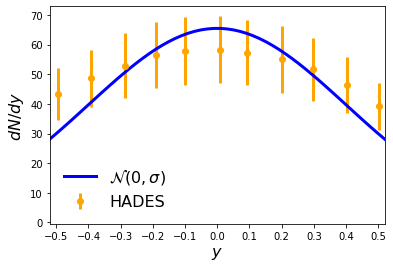

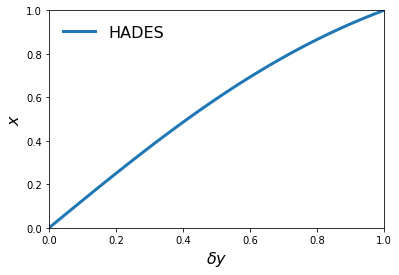

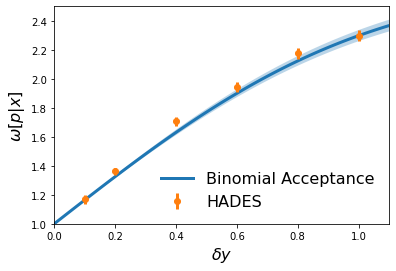

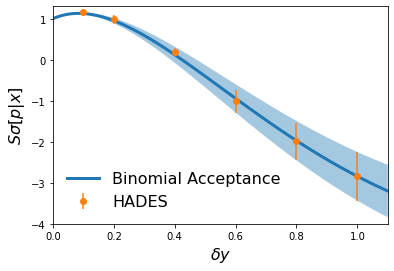

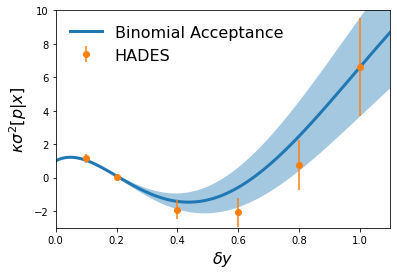

In [83]:
###Set width of the distribution in rapidity
width=.4
#for spectra of hades .623


x=np.linspace(-1,1,100)
params,cov=curve_fit(gauss,hades_top[:,0],(hades_top[:,1]+hades_bottom[:,1])/2)
print(params)
y=np.empty(100,dtype=np.float32)

plt.errorbar(hades_top[:,0],(hades_top[:,1]+hades_bottom[:,1])/2,(hades_top[:,1]-hades_bottom[:,1]),lw=3,label="HADES", fmt='o',color="orange")
#plt.fill_between(-hades_top[:,0],hades_top[:,1]/.6,hades_bottom[:,1]/.6,color="orange")
norm1 = integrate.quad(lambda z: gauss(z,0,.386,1), -.5, .5)[0]
norm2 = integrate.quad(lambda z: gauss(z,0,.56,1), -.5, .5)[0]
def tofit(x,A):
    return gauss(x,0,width,A)
params,cov=curve_fit(tofit,hades_top[:,0],(hades_top[:,1]+hades_bottom[:,1])/2,method="dogbox") 
params = [0,width,params[0]]
for i in range(100):
    y1[i]=gauss(x[i],*params)
#plt.plot(x,y,label="BAC 1",lw=3)
plt.plot(x,y1,label=r"$\mathcal{N}(0,\sigma)$",lw=3,color="blue")
#np.savetxt("spectra.dat",np.stack((x,y1),axis=1))
plt.xlabel(r'$y$',size=16)
plt.ylabel(r'$dN/dy$',size=16)
plt.xlim(-.52,.52)
plt.xticks(np.arange(-.5,.6,.1))
#plt.ylim(.5,1.1)
plt.legend(frameon=False,fontsize=16)
plt.savefig("yspectra.pdf",format="pdf")
plt.show()

x=np.linspace(0,.55,100)
for i in range(100):
    y[i]=x_from_y(x[i],width)
Y=y
#np.savetxt("acceptance.dat",np.stack((x,y),axis=1))
plt.plot(2*x,y,label="HADES",lw=3)
#plt.fill_between(x,y_top,y_bottom,label="HADES",color="green")
plt.xlabel(r'$\delta y$',size=16)
plt.ylabel(r'$x$',size=16)
plt.xlim(0,2*.5)
plt.ylim(0,1)

plt.legend(frameon=False,fontsize=16)
plt.savefig("acceptance.pdf",format="pdf")
plt.show()



plt.plot(2*x,wn(Y,w_data[-1]),label="Binomial Acceptance",lw=3)
plt.errorbar(2*x_data,w_data,yerr=data[:,2],fmt='o',label="HADES",lw=3)
plt.fill_between(2*x,wn(Y,w_data[-1]+data[-1,2]),wn(Y,w_data[-1]-data[-1,2]),alpha=.3)
plt.xlabel(r'$\delta y$',size=16)
plt.ylabel(r'$\omega[p|x]$',size=16)
#np.savetxt("omega.dat",np.stack((x,wn(Y,w_data[-1]+data[-1,2]),wn(Y,w_data[-1]-data[-1,2])),axis=1))
#plt.text(.3,1.4,'$\omega[p|1]=2.6$',size=16)
plt.xlim(0,2*.55)
plt.ylim(1,2.5)

plt.legend(frameon=False,fontsize=16)
plt.savefig("omega.pdf",format="pdf")
plt.show()

plt.plot(2*x,Sn(Y,w_data[-1],skew_data[-1]),label="Binomial Acceptance",lw=3)
plt.fill_between(2*x,Sn(Y,w_data[-1],skew_data[-1]+data[-1,4]),Sn(Y,w_data[-1],skew_data[-1]-data[-1,4]),alpha=.4)
plt.errorbar(2*x_data,skew_data,yerr=data[:,4],fmt='o',label="HADES")
plt.xlabel(r'$\delta y$',size=16)
plt.ylabel(r'$S\sigma[p|x]$',size=16)
#plt.text(.3,1.4,'$\omega[p|1]=2.6$',size=16)
plt.xlim(0,2*.55)
plt.ylim(-4,1.3)
#np.savetxt("skewness.dat",np.stack((x,Sn(Y,w_data[-1],skew_data[-1]+data[-1,4]),Sn(Y,w_data[-1],skew_data[-1]-data[-1,4])),axis=1))

plt.legend(frameon=False,fontsize=16)
plt.savefig("Skewness.pdf",format="pdf")
plt.show()

plt.plot(2*x,kn(Y,w_data[-1],skew_data[-1],kurt_data[-1]),label="Binomial Acceptance",lw=3)
plt.fill_between(2*x,kn(Y,w_data[-1],skew_data[-1],kurt_data[-1]+data[-1,6]),kn(Y,w_data[-1],skew_data[-1],kurt_data[-1]-data[-1,6]),alpha=.4)
plt.errorbar(2*x_data,kurt_data,yerr=data[:,6],fmt='o',label="HADES")
plt.xlabel(r'$\delta y$',size=16)
plt.ylabel(r'$\kappa\sigma^2[p|x]$',size=16)
#plt.text(.3,1.4,'$\omega[p|1]=2.6$',size=16)
plt.xlim(0,2*.55)
plt.ylim(-3.,10)
#np.savetxt("kurtosis.dat",np.stack((x,kn(Y,w_data[-1],skew_data[-1],kurt_data[-1]+data[-1,6]),kn(Y,w_data[-1],skew_data[-1],kurt_data[-1]-data[-1,6])),axis=1))

plt.legend(frameon=False,fontsize=16)
plt.savefig("Kurtosis.pdf",format="pdf")
plt.show()
